# Aave Grants DAO Activity: Trends in Proposals, Funding, and Categories

### Omniacs.DAO

### 2025-30-07

<img src="Shot_Poses_IACS/OmniacPoses_01.png" width="120" style="float:right; margin: 8px 0 8px 20px;">

## Introduction

The Aave Grants DAO exists to provide grants to innovative ideas and projects which have a direct benefit to the broader Aave community. The DAO funds grants from a broad array of categories including developer tooling, events, and applications.

In this analysis, we've collected data on the historical grants that have been submitted to the DAO. The information includes data on the grant proposal itself, as well as information on the reviews of that proposal. This analysis is produced in an effort to provide the utmost transparency about the Aave Grants DAO, and to derive insights into what types of projects have consistently done the best in terms of acceptance, and ultimate outcomes.

This document focuses on an overall analysis, where we look at the overall trajectory of the grant proposals, and break it down by amounts and categories.

In [1]:
# Load Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import matplotlib.dates as mdates

# Set a consistent plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Read data using pandas
try:
    grants = pd.read_csv("data/ApplicationsAnonymized.csv")
    grants = grants.rename(columns={'Interview Rational': 'Interview Rationale'})
except FileNotFoundError:
    print("Error: 'data/ApplicationsAnonymized.csv' not found. Make sure the data is in the correct directory.")
    grants = pd.DataFrame() # Create empty dataframe to avoid further errors

# Define color palette
col_pal = ["#7DC5EE", "#9D5C9E", "#69B4C1", "#99D17B", "#B4654A",
             "#1E3231", "#F6C0D0", "#556F44", "#283F3B", "#1B2432",
             "#121420", "#EE8434", "#FCF0CC"]
sns.set_palette(sns.color_palette(col_pal))

# Display first few rows to confirm loading
if not grants.empty:
    display(grants.head())

,Project Name,Record ID,Review,Applicant Name,Status,Recipients,Grant Category,Reviewer,Reviewer ID,Project Description,...,Amount Paid,Days since pending,Today's Date,Approval Email,Feedback,Grant (from Recipients),Status (from Recipients),Reviewer (from Review Feedback),Previous Grants,Source
0,Aave-Pricing,rec1zAXuVn0fA6zv1,"""No, shouldn't fund.""",Applicant1,Review failed,NaN,Developer tooling,Reviewer1,ReviewerID1,Summary: \nAave-Pricing is an innovative proje...,...,NaN,51,"July 23, 2024",NaN,NaN,NaN,NaN,ReviewerFromReviewFeedback1,No,Twitter
1,deuces9ers/deucespicknpin,recuXILXMjBhd7Ee5,"""No, shouldn't fund.""",Applicant2,Review failed,NaN,Developer tooling,Reviewer1,ReviewerID1,described above,...,NaN,50,"July 23, 2024",NaN,NaN,NaN,NaN,ReviewerFromReviewFeedback1,No,Website
2,ForeignAssistance,recnsFU8JUlLvcxMK,"""No, shouldn't fund.""",Applicant3,Review failed,NaN,Applications and integrations,Reviewer1,ReviewerID1,ForeignAssistance is a dApp for helping studen...,...,NaN,43,"July 23, 2024",NaN,NaN,NaN,NaN,ReviewerFromReviewFeedback1,No,Website
3,Nodefy,reczWBbAvY7NN4alT,NaN,Applicant4,In progress,NaN,Applications and integrations,Reviewer2,ReviewerID2,Nodefy is a notifications-as-a-service solutio...,...,NaN,40,"July 23, 2024",NaN,NaN,NaN,NaN,ReviewerFromReviewFeedback2,No,Research
4,GameGPT,reco2P5P0vd8RNcKX,NaN,Applicant5,In progress,NaN,Community (marketing and educational),Reviewer3,ReviewerID3,"GameGPT, developed by Prism, is designed to of...",...,NaN,40,"July 23, 2024",NaN,NaN,NaN,NaN,ReviewerFromReviewFeedback2,No,Research


![](./data/cover.png)

## Overall Grants DAO Analysis

### Grant Proposal Volume Over Time

Looking broadly at the number of proposals received over time, we see a significant increase in 2022, after a comparative dropoff in late 2021.

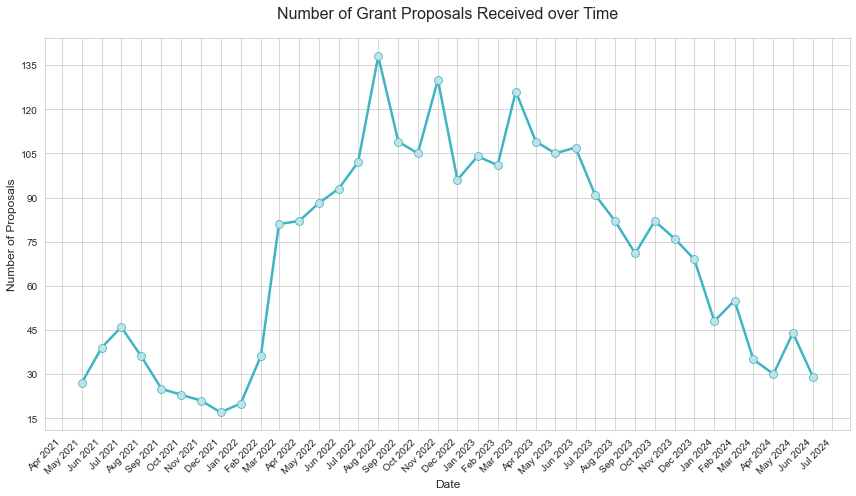

In [2]:
if not grants.empty:
    # Convert 'Month' column to datetime objects.
    # The format seems inconsistent in the source file, so we let pandas infer it.
    # Using errors='coerce' will turn any unparseable dates into NaT (Not a Time).
    grants['Date'] = pd.to_datetime(grants['Month'], errors='coerce')

    # Drop rows where date could not be parsed to ensure data integrity
    grants.dropna(subset=['Date'], inplace=True)

    # Group by month and count proposals
    monthly_counts = grants.groupby(pd.Grouper(key='Date', freq='MS')).size().reset_index(name='Count')

    # Create the plot
    plt.figure(figsize=(12, 7))
    ax = sns.lineplot(data=monthly_counts, x='Date', y='Count', color="#3FB5C3", marker='o', markersize=8, linewidth=2.5, markerfacecolor='#C0E2E7', markeredgecolor='#3FB5C3')

    # Formatting the plot
    ax.set_title('Number of Grant Proposals Received over Time', fontsize=16, pad=20)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Number of Proposals', fontsize=12)
    
    # Format x-axis to show month and year
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.xticks(rotation=45, ha='right')
    
    # Set y-axis to have integer breaks
    ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    plt.tight_layout()
    plt.show()

<img src="Shot_Poses_IACS/OmniacPoses_02.png" width="120" style="float:left; margin: 8px 0 8px 20px;">

A cumulative view of this data makes the increase in recent months even more obvious, with the number of proposals rising from just over 250 at the start of 2022 to over 600 now.

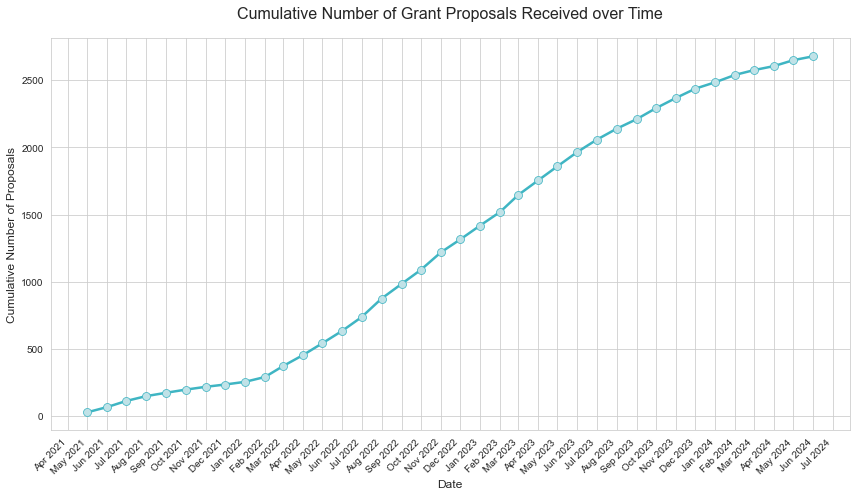

In [3]:
if not grants.empty:
    # Calculate cumulative count
    monthly_counts['CumeCount'] = monthly_counts['Count'].cumsum()

    # Create the plot
    plt.figure(figsize=(12, 7))
    ax = sns.lineplot(data=monthly_counts, x='Date', y='CumeCount', color="#3FB5C3", marker='o', markersize=8, linewidth=2.5, markerfacecolor='#C0E2E7', markeredgecolor='#3FB5C3')

    # Formatting the plot
    ax.set_title('Cumulative Number of Grant Proposals Received over Time', fontsize=16, pad=20)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Cumulative Number of Proposals', fontsize=12)
    
    # Format x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

We can aggregate down and look at the quarter level to see this as well, where the second quarter of 2022, despite not being complete at the time of this writing, had the most submissions of any quarter thus far.

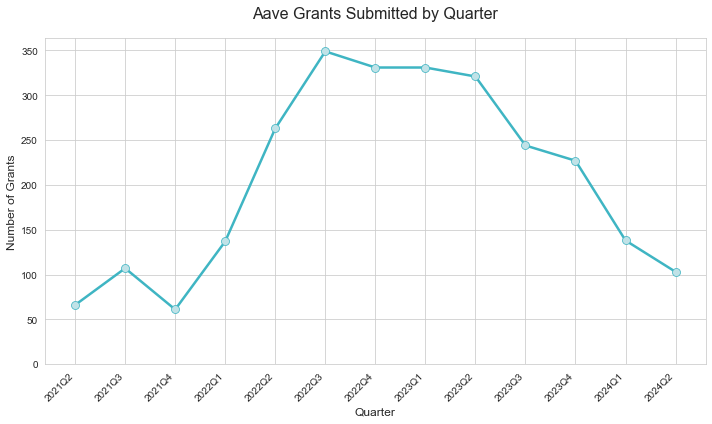

In [4]:
if not grants.empty:
    # Create Quarter column from the Date
    grants['Quarter'] = grants['Date'].dt.to_period('Q').astype(str)

    # Group by quarter and count grants
    quarterly_submissions = grants.groupby('Quarter').size().reset_index(name='Grants')

    # Create the plot
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(data=quarterly_submissions, x='Quarter', y='Grants', color="#3FB5C3", marker='o', markersize=8, linewidth=2.5, markerfacecolor='#C0E2E7', markeredgecolor='#3FB5C3', sort=False)

    # Formatting the plot
    ax.set_title('Aave Grants Submitted by Quarter', fontsize=16, pad=20)
    ax.set_xlabel('Quarter', fontsize=12)
    ax.set_ylabel('Number of Grants', fontsize=12)
    ax.set_ylim(0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

<img src="Shot_Poses_IACS/OmniacPoses_03.png" width="120" style="float:right; margin: 8px 0 8px 20px;">

The number of proposals accepted, however, has remained relatively consistent, ranging between 11 and 15 in any given quarter, despite the increase in the number of proposals received.

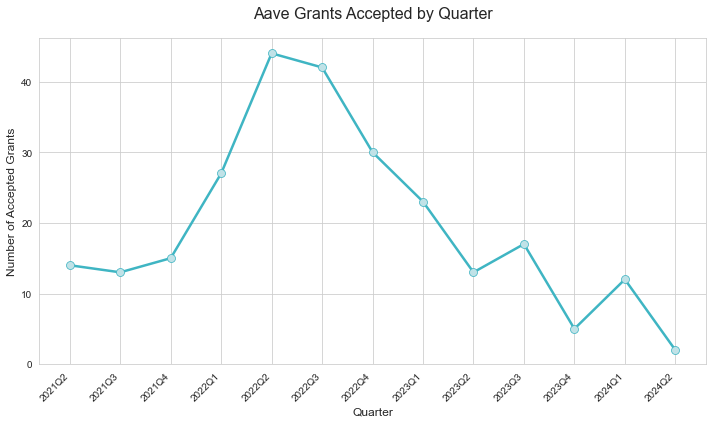

In [5]:
if not grants.empty:
    # Define status categories
    accepted_statuses = ["1st payment made ", "Approved", "Paid in full"]
    rejected_statuses = ["Denial confirmed", "Denial Confirmed", "Review failed", "Screening failed"]

    # Use np.select for conditional assignment, which is more efficient than apply
    conditions = [
        grants['Status'].isin(accepted_statuses),
        grants['Status'].isin(rejected_statuses) | grants['Status'].isna()
    ]
    choices = ['Accepted', 'Rejected']
    grants['Status2'] = np.select(conditions, choices, default='Pending Review')

    # Filter for accepted grants and count by quarter
    quarterly_accepted = (grants[grants['Status2'] == 'Accepted']
                          .groupby('Quarter')
                          .size()
                          .reset_index(name='Grants'))

    # Create the plot
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(data=quarterly_accepted, x='Quarter', y='Grants', color="#3FB5C3", marker='o', markersize=8, linewidth=2.5, markerfacecolor='#C0E2E7', markeredgecolor='#3FB5C3', sort=False)

    # Formatting the plot
    ax.set_title('Aave Grants Accepted by Quarter', fontsize=16, pad=20)
    ax.set_xlabel('Quarter', fontsize=12)
    ax.set_ylabel('Number of Accepted Grants', fontsize=12)
    ax.set_ylim(0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

We can also look at the acceptance rate of proposals, broken down by the type of interview, whether it was a written application or a video interview. Those that had a video interview tended to have a higher acceptance rate than those with an application, 10.6% vs. 3.9%.

In [6]:
if not grants.empty:
    # Create 'Interview Type' column
    grants['Interview Type'] = np.where(grants['Interviewer'].isna(), 'Written Application', 'Video Interview')

    # Group by interview type and status to get counts
    acceptance_df = grants.groupby(['Interview Type', 'Status2']).size().unstack(fill_value=0)

    # Calculate total and acceptance rate
    acceptance_df['Total'] = acceptance_df.sum(axis=1)
    acceptance_df['Acceptance Rate'] = acceptance_df['Accepted'] / acceptance_df['Total']

    # Format for display
    display_df = acceptance_df[['Acceptance Rate']].style.format({'Acceptance Rate': '{:.1%}'})
    display(display_df)

Status2,Acceptance Rate
Interview Type,
Video Interview,9.6%


<div style="text-align: left;">
  <img src="Shot_Poses_IACS/OmniacPoses_04.png" width="150"/>
</div>

### Grant Amounts

Next, let's turn our attention to analyzing the grant amounts, both the amount in the proposal, and the amount actually dispersed. To begin, let's take a look at the Grant Amount distribution. We see immediately that grants tend to be under around \$100,000 typically, but on the more extreme end, some grants are for up to \$500,000.

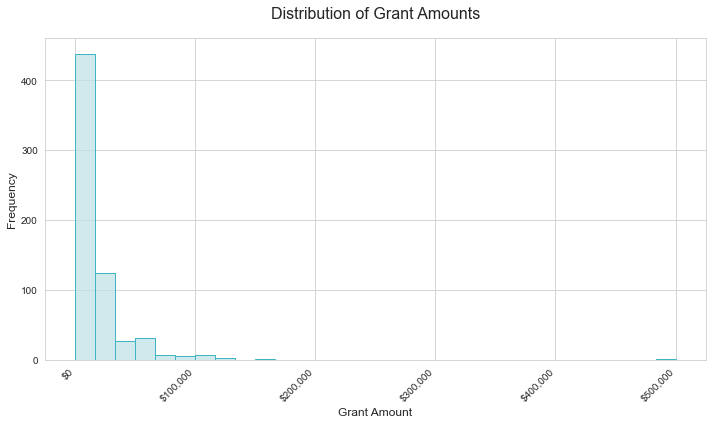

In [7]:
if not grants.empty:
    # Clean the currency column, coercing errors to NaN
    grants['Grant Amount Numeric'] = pd.to_numeric(grants['Reviewer - Grant Amount'].astype(str).str.replace('$', '', regex=False), errors='coerce')

    # Create the histogram
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=grants, x='Grant Amount Numeric', color='#C0E2E7', edgecolor='#3FB5C3', bins=30)

    # Formatting the plot
    ax.set_title('Distribution of Grant Amounts', fontsize=16, pad=20)
    ax.set_xlabel('Grant Amount', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Looking at the amount dispersed/paid by month, during the peak of the Cryptocurrency market in Q2 2021, the highest amounts in USD were paid. There was also a noticeable jump in the January - April 2022 time frame.

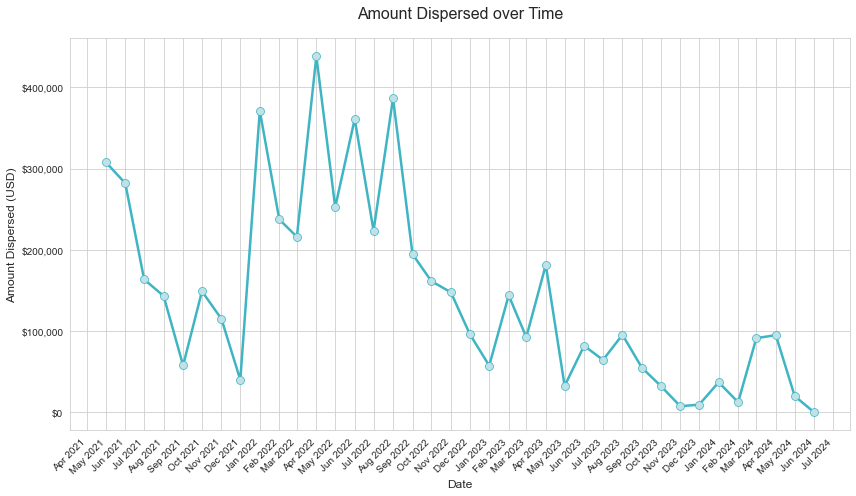

In [8]:
if not grants.empty:
    # Clean 'Amount Paid' column
    grants['Amount Paid Numeric'] = pd.to_numeric(grants['Amount Paid'].astype(str).str.replace('$', '', regex=False), errors='coerce')

    # Group by month and sum the amounts
    dispersed_by_month = grants.groupby(pd.Grouper(key='Date', freq='MS'))['Amount Paid Numeric'].sum().reset_index()

    # Create the plot
    plt.figure(figsize=(12, 7))
    ax = sns.lineplot(data=dispersed_by_month, x='Date', y='Amount Paid Numeric', color="#3FB5C3", marker='o', markersize=8, linewidth=2.5, markerfacecolor='#C0E2E7', markeredgecolor='#3FB5C3')

    # Formatting the plot
    ax.set_title('Amount Dispersed over Time', fontsize=16, pad=20)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Amount Dispersed (USD)', fontsize=12)
    
    # Format axes
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Here is the same plot of funds dispersed, but with annotations for the Aave Grants DAO proposal period.

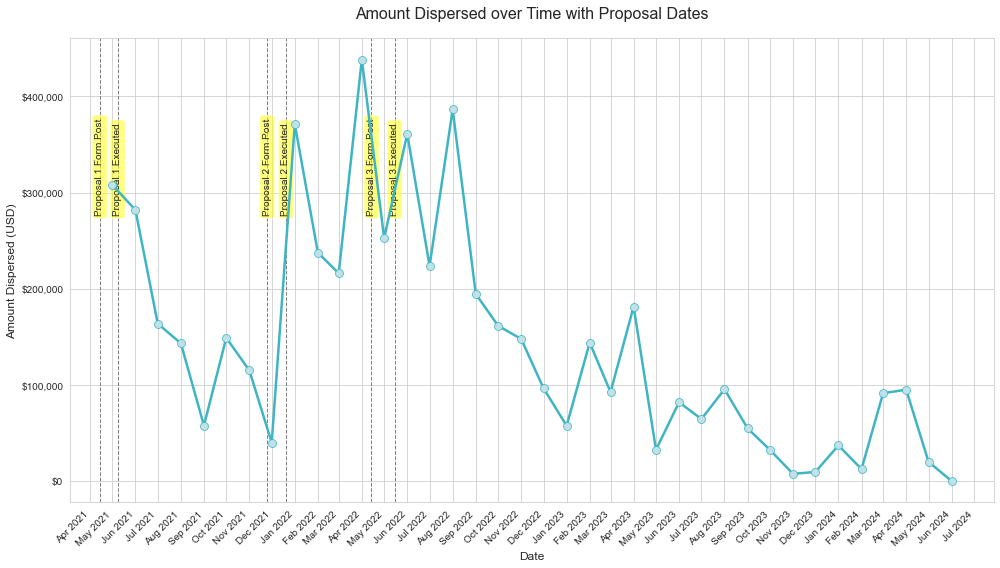

In [9]:
if not grants.empty:
    # Create annotation data
    annot_data = pd.DataFrame({
        'Date': pd.to_datetime(["2021-04-14", "2021-05-08", "2021-11-25", "2021-12-20", "2022-04-14", "2022-05-15"]),
        'Label': ["Proposal 1 Form Post", "Proposal 1 Executed", "Proposal 2 Form Post", "Proposal 2 Executed",
                  "Proposal 3 Form Post", "Proposal 3 Executed"]
    })

    # Create the plot
    plt.figure(figsize=(14, 8))
    ax = sns.lineplot(data=dispersed_by_month, x='Date', y='Amount Paid Numeric', color="#3FB5C3", marker='o', markersize=8, linewidth=2.5, markerfacecolor='#C0E2E7', markeredgecolor='#3FB5C3', zorder=5)

    # Add vertical lines and annotations
    for i, row in annot_data.iterrows():
        ax.axvline(x=row['Date'], color='grey', linestyle='--', linewidth=1)
        ax.text(row['Date'], ax.get_ylim()[1] * 0.6, row['Label'], rotation=90, 
                verticalalignment='bottom', horizontalalignment='center', 
                fontsize=10, bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5))

    # Formatting the plot
    ax.set_title('Amount Dispersed over Time with Proposal Dates', fontsize=16, pad=20)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Amount Dispersed (USD)', fontsize=12)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

<div style="text-align: left;">
  <img src="Shot_Poses_IACS/OmniacPoses_05.png" width="150"/>
</div>

When we look at the amount actually paid/dispersed by quarter, we see that quarters have typically seen anywhere between about 200k to 600k USD actually dispersed.

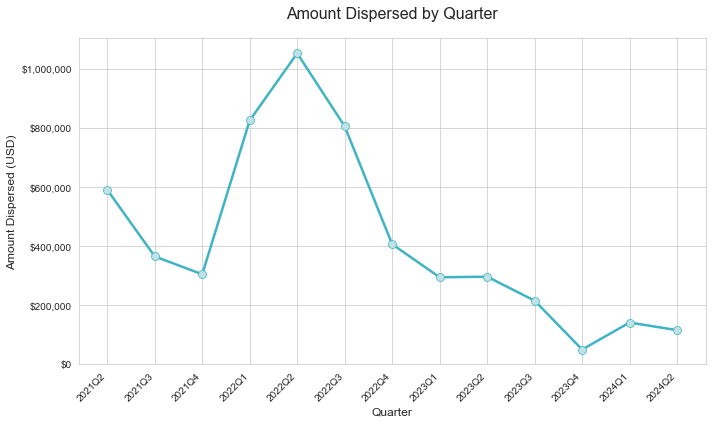

In [10]:
if not grants.empty:
    # Group by quarter and sum amounts
    dispersed_by_quarter = grants.groupby('Quarter')['Amount Paid Numeric'].sum().reset_index()

    # Create the plot
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(data=dispersed_by_quarter, x='Quarter', y='Amount Paid Numeric', color="#3FB5C3", marker='o', markersize=8, linewidth=2.5, markerfacecolor='#C0E2E7', markeredgecolor='#3FB5C3', sort=False)

    # Formatting the plot
    ax.set_title('Amount Dispersed by Quarter', fontsize=16, pad=20)
    ax.set_xlabel('Quarter', fontsize=12)
    ax.set_ylabel('Amount Dispersed (USD)', fontsize=12)
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
    ax.set_ylim(0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Finally, we can take a look at this data cumulatively, where we see immediately that nearly 2 million USD has been paid out collectively.

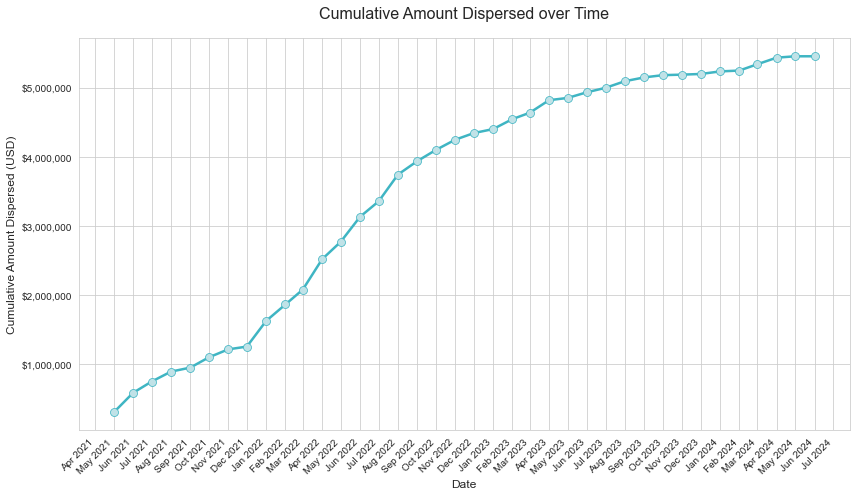

In [11]:
if not grants.empty:
    # Calculate cumulative sum of dispersed amount
    dispersed_by_month['Cumulative Amount'] = dispersed_by_month['Amount Paid Numeric'].cumsum()

    # Create the plot
    plt.figure(figsize=(12, 7))
    ax = sns.lineplot(data=dispersed_by_month, x='Date', y='Cumulative Amount', color="#3FB5C3", marker='o', markersize=8, linewidth=2.5, markerfacecolor='#C0E2E7', markeredgecolor='#3FB5C3')

    # Formatting the plot
    ax.set_title('Cumulative Amount Dispersed over Time', fontsize=16, pad=20)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Cumulative Amount Dispersed (USD)', fontsize=12)
    
    # Format axes
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

<div style="display: flex; justify-content: space-between; align-items: flex-end;">
  <img src="Shot_Poses_IACS/OmniacPoses_07.png" width="110"/>
  <img src="Shot_Poses_IACS/OmniacPoses_08.png" width="110"/>
  <img src="Shot_Poses_IACS/OmniacPoses_09.png" width="110"/>
</div>

### Grant Categories

Next, let's further break this data down and look at some analysis based on the category of the grant. These are the categories that have been used for grant proposals thus far:

1.  Applications and integrations
2.  Code audits
3.  Committees & DAOs that serve Aave's ecosystem
4.  Community (marketing and educational)
5.  Developer tooling
6.  Events / Hackathons / Sponsorships
7.  Protocol
8.  Other

First, we look at a simple bar chart breaking down the number of each category. We immediately see that Applications and integrations is the most common, followed by Community grants.

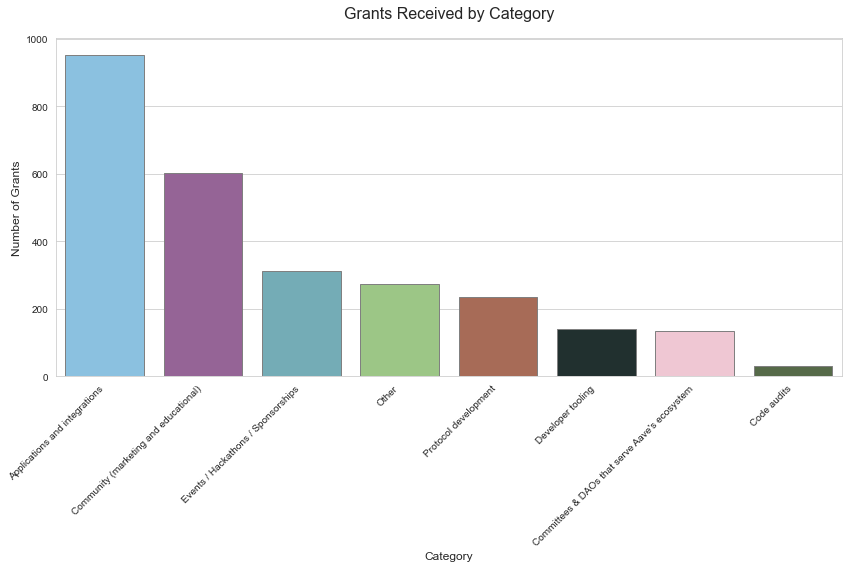

In [12]:
if not grants.empty:
    # Create the bar chart
    plt.figure(figsize=(12, 8))
    # Use a specific order to match the original if needed, or let seaborn decide
    category_order = grants['Category'].value_counts().index
    ax = sns.countplot(data=grants, x='Category', order=category_order, palette=col_pal, edgecolor='grey')

    # Formatting the plot
    ax.set_title('Grants Received by Category', fontsize=16, pad=20)
    ax.set_xlabel('Category', fontsize=12)
    ax.set_ylabel('Number of Grants', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

How does this acceptance rate vary by category? Below we can take a look at that data. We see that acceptance rates for proposals by category are fairly consistent, typically falling in the single digits.

In [13]:
if not grants.empty:
    # Group by category and status
    category_acceptance = grants.groupby(['Grant Category', 'Status2']).size().unstack(fill_value=0)
    
    # Ensure all status columns exist
    for col in ['Accepted', 'Rejected', 'Pending Review']:
        if col not in category_acceptance.columns:
            category_acceptance[col] = 0
            
    # Calculate total and acceptance rate
    category_acceptance['Total'] = category_acceptance.sum(axis=1)
    category_acceptance['Acceptance Rate'] = category_acceptance['Accepted'] / category_acceptance['Total']
    
    # Reorder columns for display and format
    display_cols = ['Total', 'Accepted', 'Rejected', 'Pending Review', 'Acceptance Rate']
    display(category_acceptance[display_cols].style.format({'Acceptance Rate': '{:.1%}'}))

Status2,Total,Accepted,Rejected,Pending Review,Acceptance Rate
Grant Category,,,,,
Applications and integrations,953,118,746,89,12.4%
Code audits,31,5,26,0,16.1%
Committees & DAOs that serve Aave's ecosystem,134,18,105,11,13.4%
Community (marketing and educational),601,52,523,26,8.7%
Developer tooling,141,17,118,6,12.1%
Events / Hackathons / Sponsorships,311,15,288,8,4.8%
Other,272,11,255,6,4.0%
Protocol development,235,21,203,11,8.9%


In terms of the total amount funded, the Applications and integrations category extends its lead further, with by far the most - over 900k paid in total.

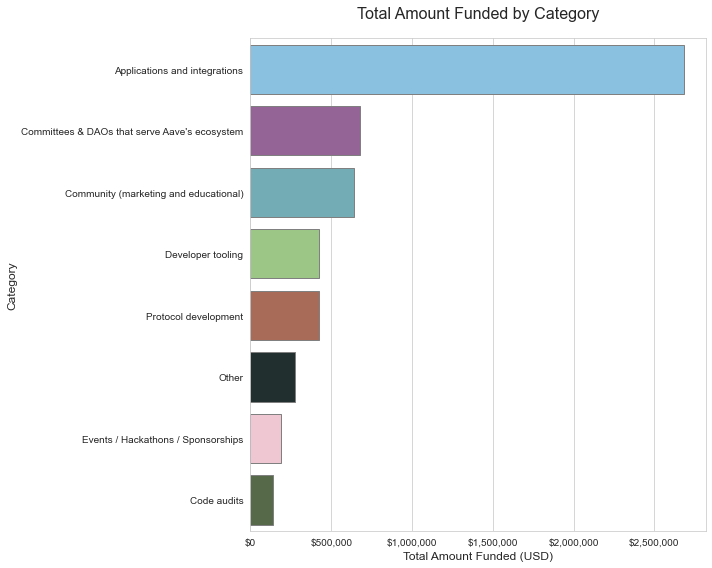

In [14]:
if not grants.empty:
    # Group by category and sum amounts
    funded_by_category = grants.groupby('Category')['Amount Paid Numeric'].sum().sort_values(ascending=False).reset_index()

    # Create the horizontal bar chart
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(data=funded_by_category, y='Category', x='Amount Paid Numeric', palette=col_pal, edgecolor='grey')

    # Formatting the plot
    ax.set_title('Total Amount Funded by Category', fontsize=16, pad=20)
    ax.set_xlabel('Total Amount Funded (USD)', fontsize=12)
    ax.set_ylabel('Category', fontsize=12)
    ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
    plt.tight_layout()
    plt.show()

<div style="text-align: right;">
  <img src="Shot_Poses_IACS/OmniacPoses_10.png" width="150"/>
</div>


Looking at how many are received by quarter in each category, we see a particular acceleration as of late in the two most common categories, applications and community.

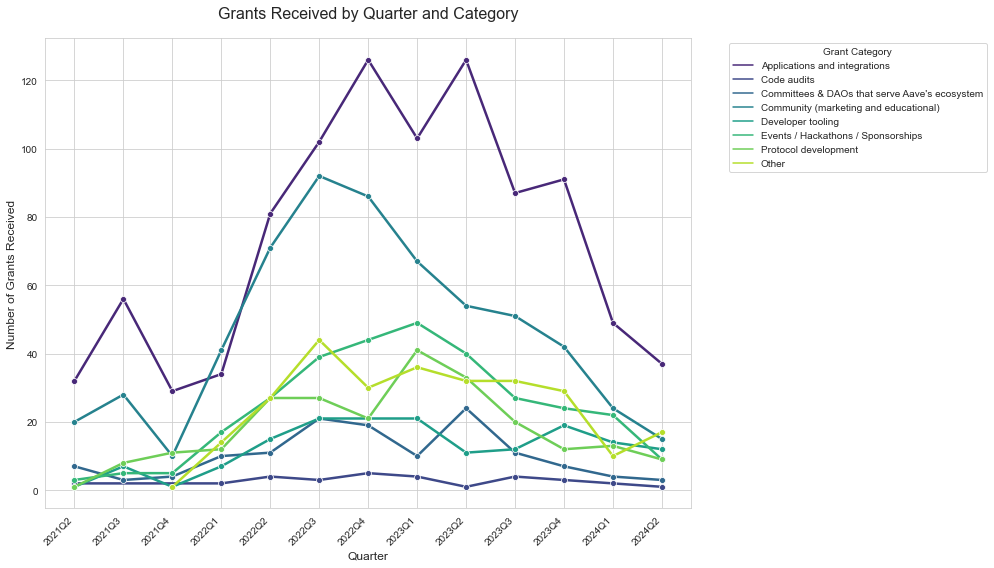

In [15]:
if not grants.empty:
    # Group by quarter and category
    received_by_quarter_cat = grants.groupby(['Quarter', 'Grant Category']).size().reset_index(name='Count')
    # Get the number of unique categories
    num_categories = received_by_quarter_cat['Grant Category'].nunique()

    # Automatically create a color palette with the correct number of colors
    col_pal = sns.color_palette("viridis", n_colors=num_categories)
    # Create the line plot with different colors for each category
    plt.figure(figsize=(14, 8))
    ax = sns.lineplot(data=received_by_quarter_cat, x='Quarter', y='Count', hue='Grant Category', 
                      palette=col_pal, marker='o', linewidth=2.5)

    # Formatting the plot
    ax.set_title('Grants Received by Quarter and Category', fontsize=16, pad=20)
    ax.set_xlabel('Quarter', fontsize=12)
    ax.set_ylabel('Number of Grants Received', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Grant Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

<div style="text-align: left;">
  <img src="Shot_Poses_IACS/OmniacPoses_10.png" width="150"/>
</div>


In terms of the number accepted, however, that is relatively flat. It seems a lot of new proposals are being received in these categories, but the acceptance rate may be declining over time.

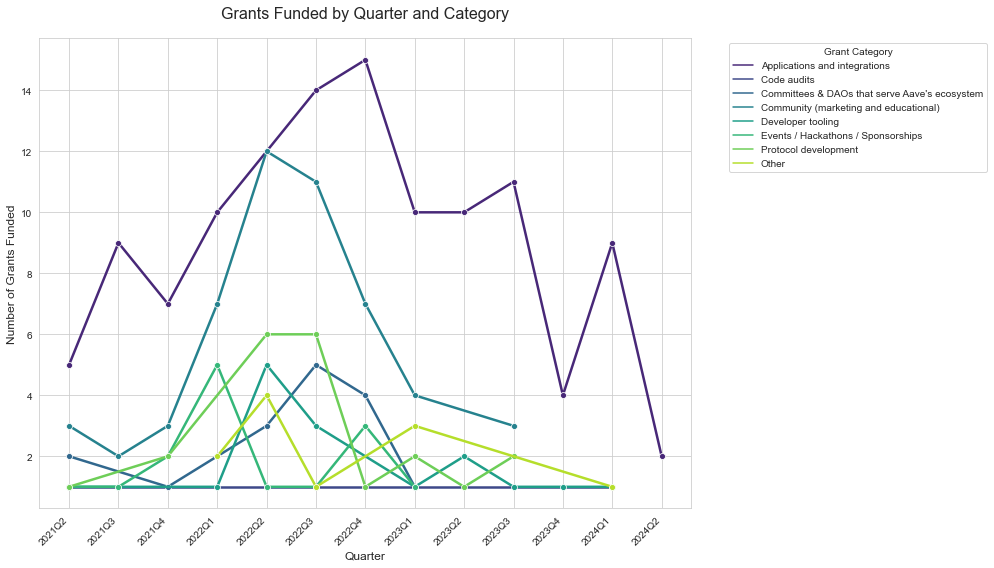

In [16]:
if not grants.empty:
    # Filter for accepted grants and group
    funded_by_quarter_cat = (grants[grants['Status2'] == 'Accepted']
                             .groupby(['Quarter', 'Grant Category'])
                             .size().reset_index(name='Count'))

    # Create the line plot
    plt.figure(figsize=(14, 8))
    ax = sns.lineplot(data=funded_by_quarter_cat, x='Quarter', y='Count', hue='Grant Category', 
                      palette=col_pal, marker='o', linewidth=2.5)

    # Formatting the plot
    ax.set_title('Grants Funded by Quarter and Category', fontsize=16, pad=20)
    ax.set_xlabel('Quarter', fontsize=12)
    ax.set_ylabel('Number of Grants Funded', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Grant Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

We can use bar charts to break down the quarterly number of projects as well, which tells the same story as the above line chart.

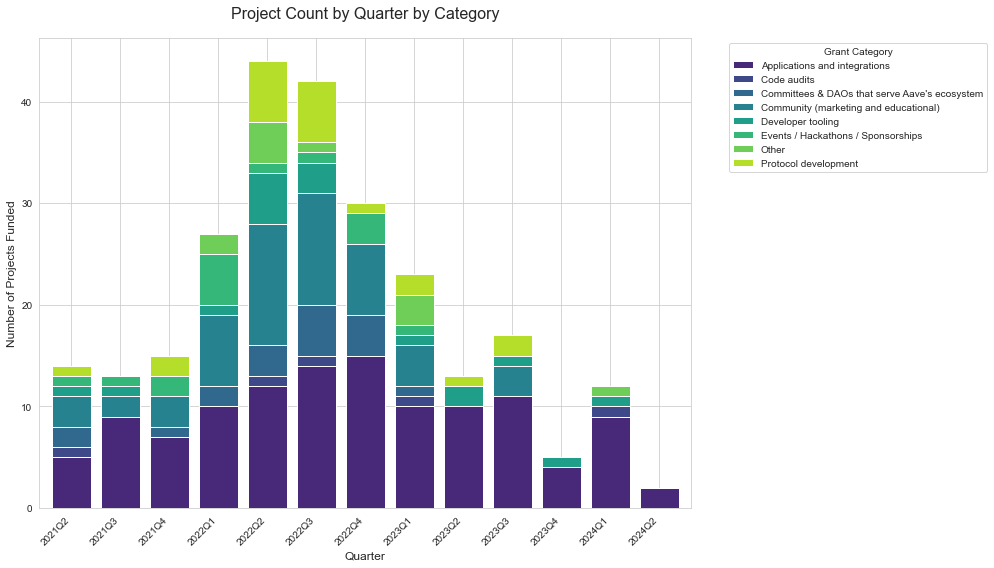

In [17]:
if not grants.empty:
    # Pivot the data to get categories as columns for stacking
    funded_pivot = funded_by_quarter_cat.pivot_table(index='Quarter', columns='Grant Category', values='Count', fill_value=0)

    # Create the stacked bar chart
    ax = funded_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), color=col_pal, width=0.8)

    # Formatting the plot
    ax.set_title('Project Count by Quarter by Category', fontsize=16, pad=20)
    ax.set_xlabel('Quarter', fontsize=12)
    ax.set_ylabel('Number of Projects Funded', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Grant Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Looking at the amount funded by quarter in a similar fashion shows the relative dominance of the applications and integrations category even more clearly.

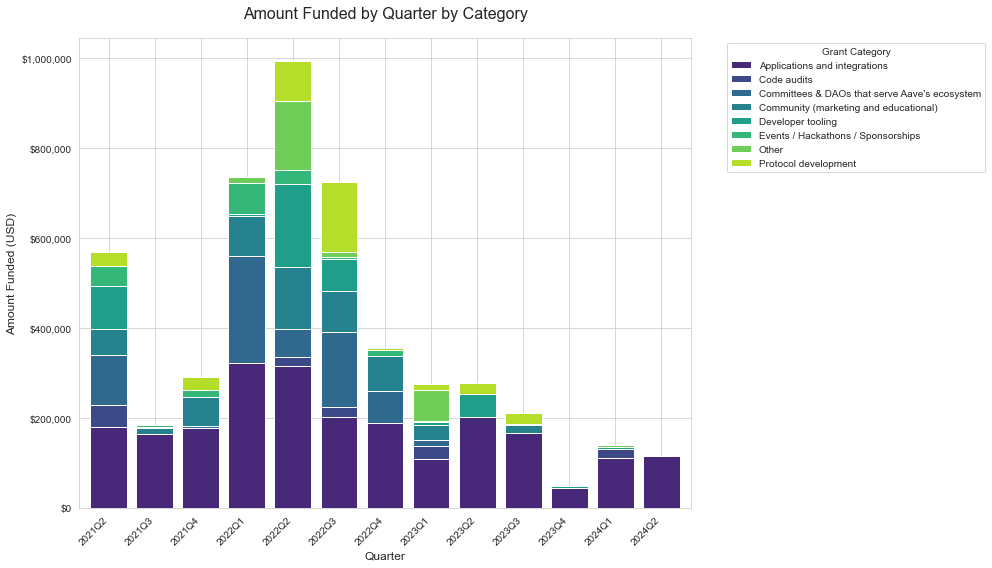

In [18]:
if not grants.empty:
    # Group by quarter and category, summing amounts
    amount_by_quarter_cat = (grants[grants['Status2'] == 'Accepted']
                             .groupby(['Quarter', 'Grant Category'])['Amount Paid Numeric']
                             .sum().reset_index())

    # Pivot for stacking
    amount_pivot = amount_by_quarter_cat.pivot_table(index='Quarter', columns='Grant Category', values='Amount Paid Numeric', fill_value=0)

    # Create the stacked bar chart
    ax = amount_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), color=col_pal, width=0.8)

    # Formatting the plot
    ax.set_title('Amount Funded by Quarter by Category', fontsize=16, pad=20)
    ax.set_xlabel('Quarter', fontsize=12)
    ax.set_ylabel('Amount Funded (USD)', fontsize=12)
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Grant Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

The cumulative number of projects by category shows a pretty steady increase, particularly for the most common grant categories.

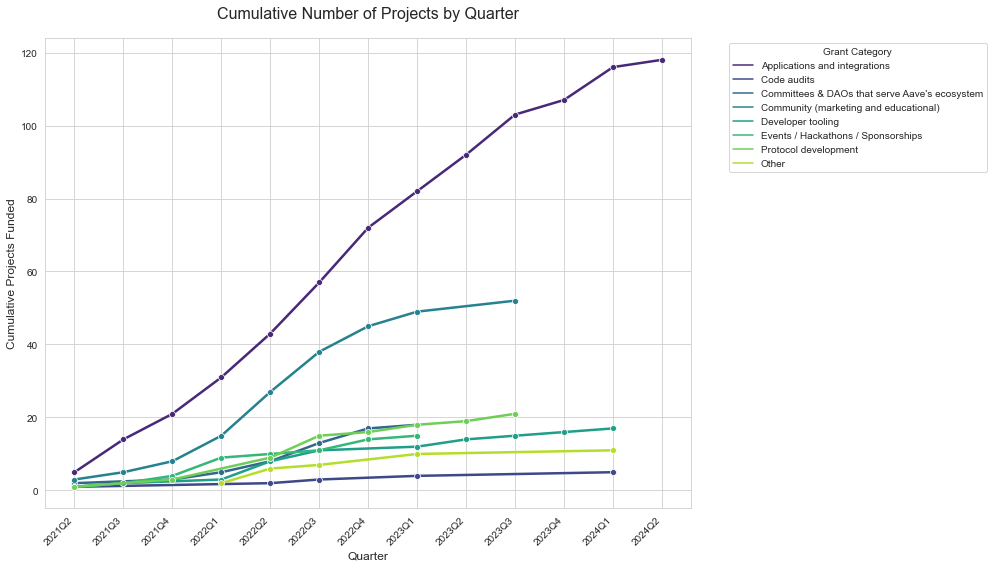

In [19]:
if not grants.empty:
    # Calculate cumulative count within each category
    funded_by_quarter_cat['Cumulative Count'] = funded_by_quarter_cat.groupby('Grant Category')['Count'].cumsum()

    # Create the line plot
    plt.figure(figsize=(14, 8))
    ax = sns.lineplot(data=funded_by_quarter_cat, x='Quarter', y='Cumulative Count', hue='Grant Category', 
                      palette=col_pal, marker='o', linewidth=2.5)

    # Formatting the plot
    ax.set_title('Cumulative Number of Projects by Quarter', fontsize=16, pad=20)
    ax.set_xlabel('Quarter', fontsize=12)
    ax.set_ylabel('Cumulative Projects Funded', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Grant Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

We can facet the above plot to help highlight the individual values a bit more clearly:

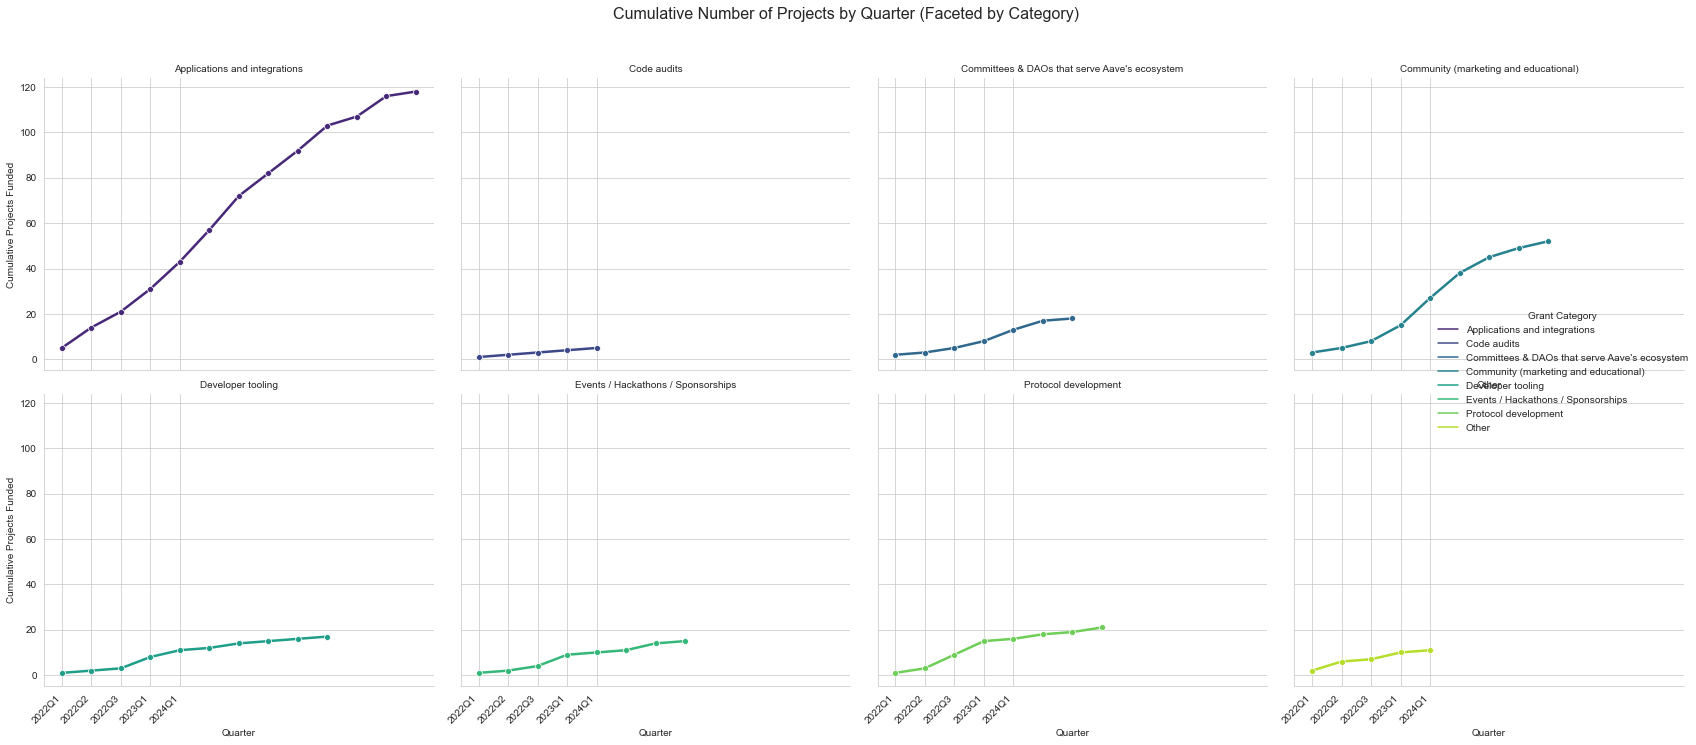

In [20]:
if not grants.empty:
    # Use Seaborn's relplot to create faceted plots
    g = sns.relplot(
        data=funded_by_quarter_cat,
        x='Quarter', y='Cumulative Count', 
        hue='Grant Category', col='Grant Category',
        kind='line', col_wrap=4, 
        palette=col_pal, marker='o', linewidth=2.5
    )

    # Formatting the plot
    g.fig.suptitle('Cumulative Number of Projects by Quarter (Faceted by Category)', y=1.03, fontsize=16)
    g.set_axis_labels('Quarter', 'Cumulative Projects Funded')
    g.set_titles("{col_name}")
    g.set_xticklabels(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

<div style="text-align: right;">
  <img src="Shot_Poses_IACS/OmniacPoses_11.png" width="150"/>
</div>


Lastly, let's look at the same visualizations for amount paid, first comparing all categories on the same chart:

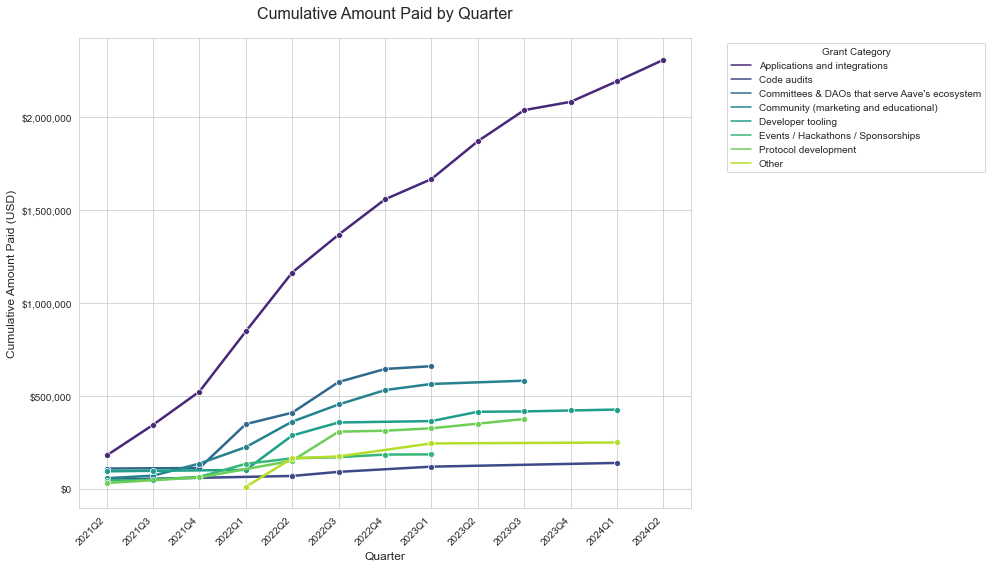

In [21]:
if not grants.empty:
    # Calculate cumulative amount within each category
    amount_by_quarter_cat['Cumulative Amount'] = amount_by_quarter_cat.groupby('Grant Category')['Amount Paid Numeric'].cumsum()

    # Create the line plot
    plt.figure(figsize=(14, 8))
    ax = sns.lineplot(data=amount_by_quarter_cat, x='Quarter', y='Cumulative Amount', hue='Grant Category', 
                      palette=col_pal, marker='o', linewidth=2.5)

    # Formatting the plot
    ax.set_title('Cumulative Amount Paid by Quarter', fontsize=16, pad=20)
    ax.set_xlabel('Quarter', fontsize=12)
    ax.set_ylabel('Cumulative Amount Paid (USD)', fontsize=12)
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Grant Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

And now, comparing them separately by faceting. There certainly seems to be room for proposals that target a wider variety of grant categories!

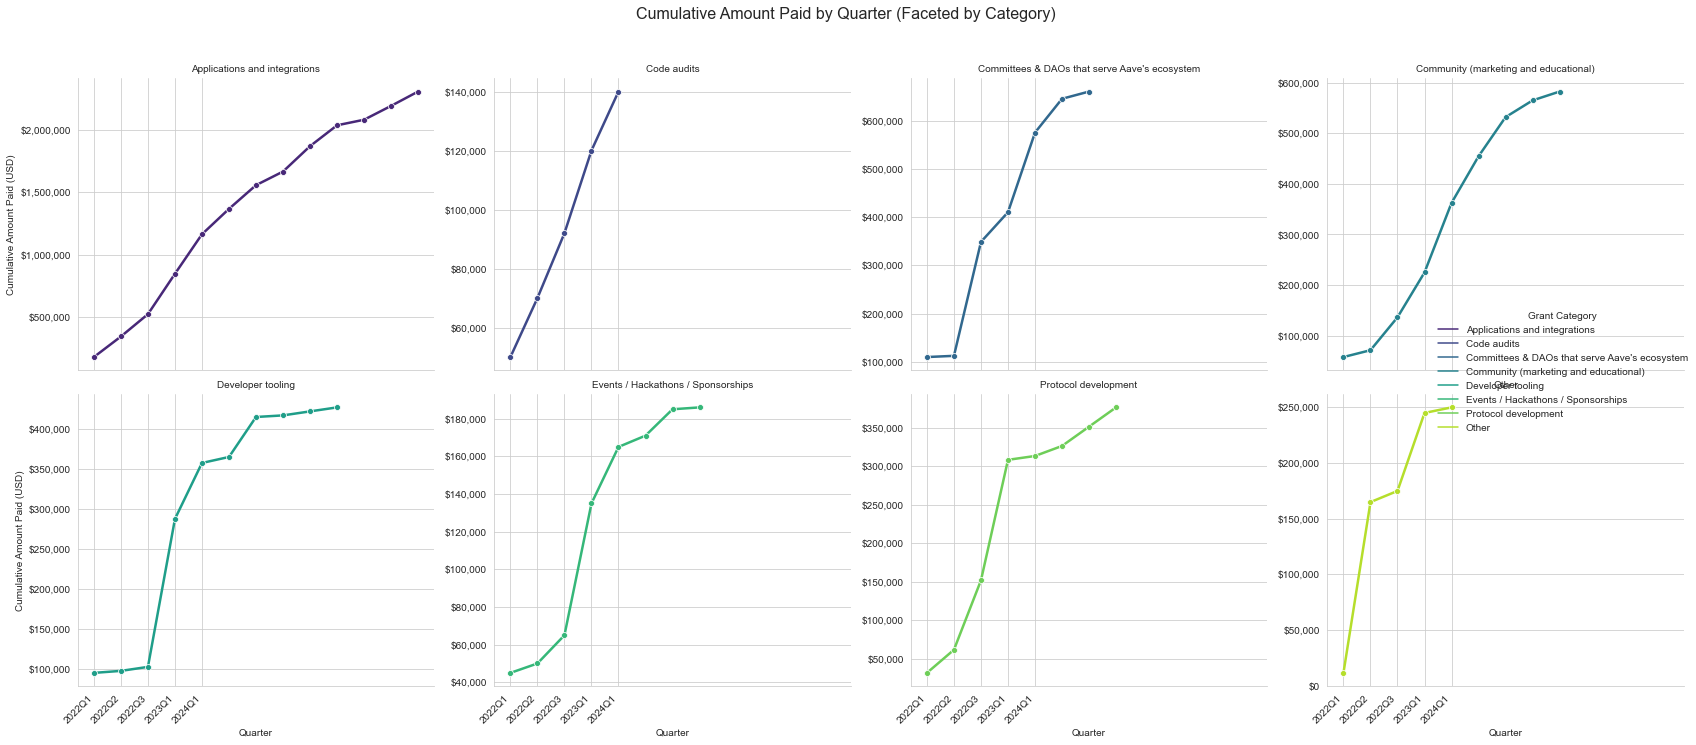

In [22]:
if not grants.empty:
    # Use Seaborn's relplot for faceting
    g = sns.relplot(
        data=amount_by_quarter_cat,
        x='Quarter', y='Cumulative Amount',
        hue='Grant Category', col='Grant Category',
        kind='line', col_wrap=4, 
        palette=col_pal, marker='o', linewidth=2.5,
        facet_kws={'sharey': False} # Allow y-axes to have different scales
    )

    # Formatting the plot
    g.fig.suptitle('Cumulative Amount Paid by Quarter (Faceted by Category)', y=1.03, fontsize=16)
    g.set_axis_labels('Quarter', 'Cumulative Amount Paid (USD)')
    g.set_titles("{col_name}")
    g.set_xticklabels(rotation=45, ha='right')
    
    # Apply currency formatting to each facet's y-axis
    for ax in g.axes.flat:
        ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
    
    plt.tight_layout()
    plt.show()

<div style="text-align: left;">
  <img src="Shot_Poses_IACS/OmniacPoses_12.png" width="150"/>
</div>


## Conclusion

This case study highlights key trends and behaviors within the Aave Grants DAO application and funding pipeline. The number of grant proposals has grown substantially over time, indicating rising interest in contributing to the Aave ecosystem. However, despite this increase, the number of accepted proposals has remained relatively steady, suggesting a consistent level of selectivity.

Applications and integrations represent the most common and most funded category, reflecting Aave's core focus on expanding its platform utility. Similarly, community and developer tooling grants remain pivotal in supporting engagement and infrastructure development.

The funding distribution trends, especially the spikes corresponding to DAO proposal execution dates, reinforce the importance of structured governance and fiscal planning. Cumulative charts demonstrate the DAO's consistent support over time, but also point toward opportunities for diversification—especially in underrepresented categories such as audits or protocol work.

Ultimately, this analysis provides a data-driven lens through which the Aave DAO can optimize its grant-making processes, improve transparency, and better align with its strategic objectives. The next section of this report will turn to reviewer behavior and how evaluations may influence funding outcomes.